In [1]:
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import scipy.signal as conv
import scipy.ndimage.filters as filters
savefig = False #True to save the figures
#savefig = True
countourlabel=True
dpi = 50
figno = '2'
ylabel_fsize = 46
xlabel_fsize = 46
ytick_labelsize = 36
xtick_labelsize = 36
colorbar_fsize = 40
colorbar_labelsize = 27
contour_fsize = 15
pad_colorbar = 0.025
marker_size = 400
xlabel = '$\phi$ (rad)'
ylabel = '$\psi$ (rad)'
fontweight = 'normal'

vmax = 60

<ipython-input-2-f79f51a38e6a>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Xn,Yn,data1,vmin=0,vmax=vmax,cmap='jet')


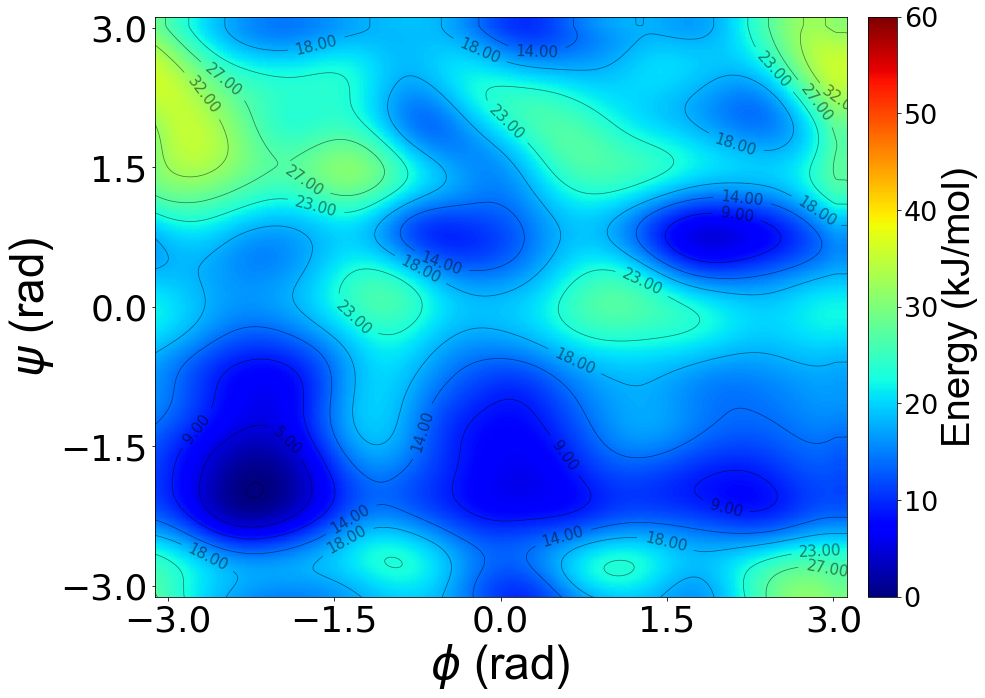

In [2]:
data = np.loadtxt('fes_10ns_remde_dftb.dat')
unique1, counts = np.unique(data[:,0],return_counts=True)
n1=len(unique1)
unique2, counts = np.unique(data[:,1],return_counts=True)
n2=len(unique2)
fes=np.reshape(data[:,2],(n1,n2))

X,Y = np.meshgrid(unique1,unique2)
Z=fes.reshape((len(unique1),len(unique1)))
c_black=np.linspace(0,90,11)
g_black=c_black+5

plt.figure(figsize=(14,9.8))
plt.gca()
plt.yticks([-3.0, -1.5, 0, 1.5, 3.0], size=ytick_labelsize)
plt.xticks([-3.0, -1.5, 0, 1.5, 3.0], size=xtick_labelsize)
plt.rc('xtick', labelsize=xtick_labelsize)
plt.rc('ytick', labelsize=ytick_labelsize)
plt.xlabel(xlabel, fontsize=xlabel_fsize, fontname = 'Arial', fontweight=fontweight)
plt.ylabel(ylabel, fontsize=ylabel_fsize, fontname = 'Arial', fontweight=fontweight)
f = interp2d(X, Y, Z, kind='cubic')
xnew = np.linspace(-np.pi, np.pi, 510)
ynew = np.linspace(-np.pi, np.pi, 510)
data1 = f(xnew,ynew)
Xn, Yn = np.meshgrid(xnew, ynew)
plt.axis([np.amin(X),np.amax(X),np.amin(Y),np.amax(Y)])
plt.pcolormesh(Xn,Yn,data1,vmin=0,vmax=vmax,cmap='jet')
#plt.colorbar(label='kJ/mol')
cbar2 = plt.colorbar(orientation="vertical", shrink=1, pad=0.025)
cbar2.ax.tick_params(labelsize=colorbar_labelsize)
cbar2.set_ticks(list(np.arange(0,vmax+10,10)))
cbar2.set_label('Energy (kJ/mol)', fontname = 'Arial', fontsize = colorbar_fsize, fontweight=fontweight)

filtermatrix = np.ones((25,25))/np.power(25,2)
Zconv = conv.convolve2d(data1.T,filtermatrix,boundary='wrap',mode='same')
Zconv = filters.gaussian_filter(data1,1.2,mode='wrap')
contoursd1 = plt.contour(xnew,ynew,Zconv,c_black,colors='k',alpha=0.5, linewidths=0.75, linestyles='solid', extend='neither')
contoursd2 = plt.contour(xnew,ynew,Zconv,g_black,colors='k',alpha=0.5, linewidths=0.75, linestyles='solid', extend='neither')
if countourlabel==True:
    plt.clabel(contoursd1, inline=True, fontsize=contour_fsize, fmt='%1.2f')
    plt.clabel(contoursd2, inline=True, fontsize=contour_fsize, colors='black', fmt='%1.2f') 
plt.ylim(-3.12, 3.12)
plt.xlim(-3.12, 3.12)
#plt.title('Remdesivir (DFTB)', fontsize=20)
plt.tight_layout()

# PES Remdesivir using DFTB